In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="measurements")
import io
color_pal = sns.color_palette()
from tqdm.notebook import tqdm
tqdm.pandas()
from matplotlib.dates import WeekdayLocator, MonthLocator, DateFormatter

In [2]:
hotels_data = pd.read_csv('/Users/giorgiotacchella/Desktop/job/lighthouse_test/hotels_information_(6).csv')
pricing_data = pd.read_csv('/Users/giorgiotacchella/Desktop/job/lighthouse_test/pricing_data_(5).csv')

# Exploratory Data Analysis

## Hotels data

In [3]:
hotels_data.head(10)

,our_hotel_id,name,review_score,stars,latitude,longitude,room_count
0,3169410,Hotel Indigo Brussels - City,8.4,4.0,50.855711,4.359679,283.0
1,3162064,Facade Hotel Amsterdam,7.6,2.0,52.374966,4.899320,30.0
2,8482738,Chasse Hotel,8.7,4.0,52.369583,4.861395,37.0
3,3169579,Hotel Le Châtelain,8.9,5.0,50.826103,4.363769,107.0
4,3922332,The Student Hotel Amsterdam City,8.7,4.0,52.354594,4.912632,200.0
5,3169712,NH Brussels Airport,8.3,4.0,50.889291,4.447009,234.0
6,7532176,Hotel TWENTY EIGHT,9.3,4.0,52.344485,4.858246,56.0
7,3162423,Avenue Hotel,7.3,3.0,52.376637,4.894656,82.0
8,3162875,Lloyd Hotel,8.0,3.0,52.374327,4.934803,117.0
9,3227893,Aparthotel Adagio Brussels Grand Place,8.5,3.0,50.850022,4.351653,140.0


There are 282 hotels in hotels data

In [4]:
hotels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   our_hotel_id  282 non-null    int64  
 1   name          282 non-null    object 
 2   review_score  281 non-null    float64
 3   stars         267 non-null    float64
 4   latitude      282 non-null    float64
 5   longitude     282 non-null    float64
 6   room_count    272 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [5]:
hotels_data.isna().sum(axis=0)

our_hotel_id     0
name             0
review_score     1
stars           15
latitude         0
longitude        0
room_count      10
dtype: int64

In [6]:
hotels_data.describe()

,our_hotel_id,review_score,stars,latitude,longitude,room_count
count,2.820000e+02,281.000000,267.000000,282.000000,282.000000,272.000000
mean,4.409062e+06,7.977580,3.584270,51.778623,4.681475,146.257353
std,2.672583e+06,1.719415,0.762993,0.734132,0.249236,120.406875
min,3.162060e+06,-1.000000,1.000000,50.793227,4.272877,7.000000
25%,3.162863e+06,7.900000,3.000000,50.850498,4.364813,52.000000
50%,3.169734e+06,8.300000,4.000000,52.333810,4.846411,111.000000
75%,3.688687e+06,8.700000,4.000000,52.365825,4.891380,207.500000
max,1.797598e+07,9.400000,5.000000,52.402075,4.986216,650.000000


<Axes: xlabel='review_score', ylabel='count'>

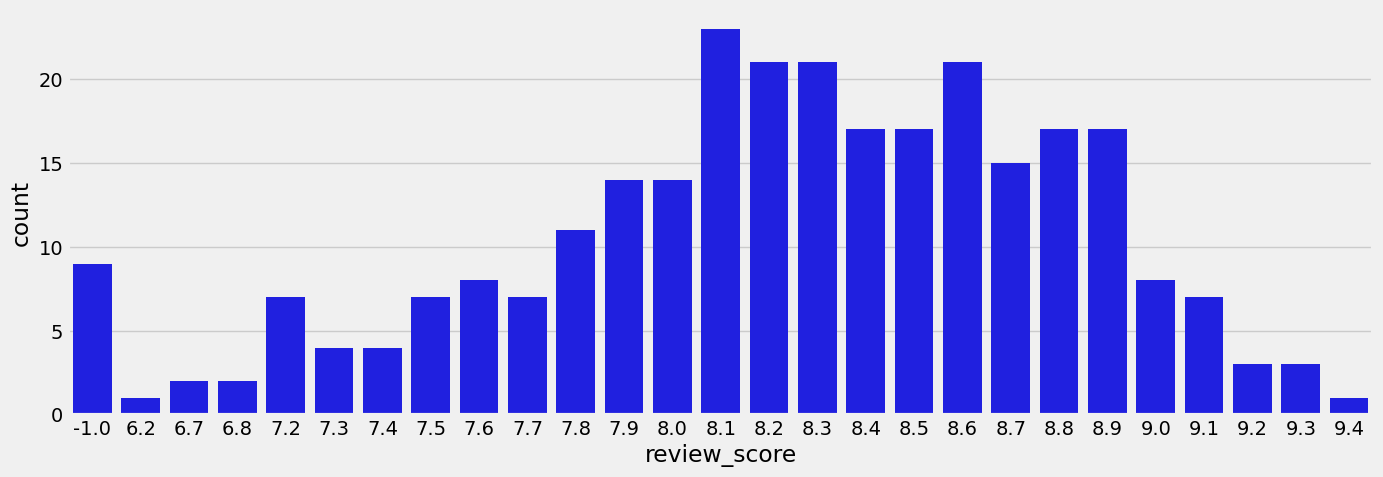

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x="review_score", data=hotels_data, color='blue')

In [8]:
len(hotels_data[(hotels_data['review_score'].isna()) 
            | (hotels_data['review_score']<0)])

10

There are 9 hotels with a negative review scores and one with no review score.

In [9]:
hotels_data = hotels_data[(hotels_data['review_score'] > 0) & (~hotels_data['review_score'].isna()) ]

In [10]:
hotels_data.isna().sum(axis=0)

our_hotel_id    0
name            0
review_score    0
stars           5
latitude        0
longitude       0
room_count      9
dtype: int64

### Star ratings

Checking if there are any negative stars values

<Axes: xlabel='stars', ylabel='count'>

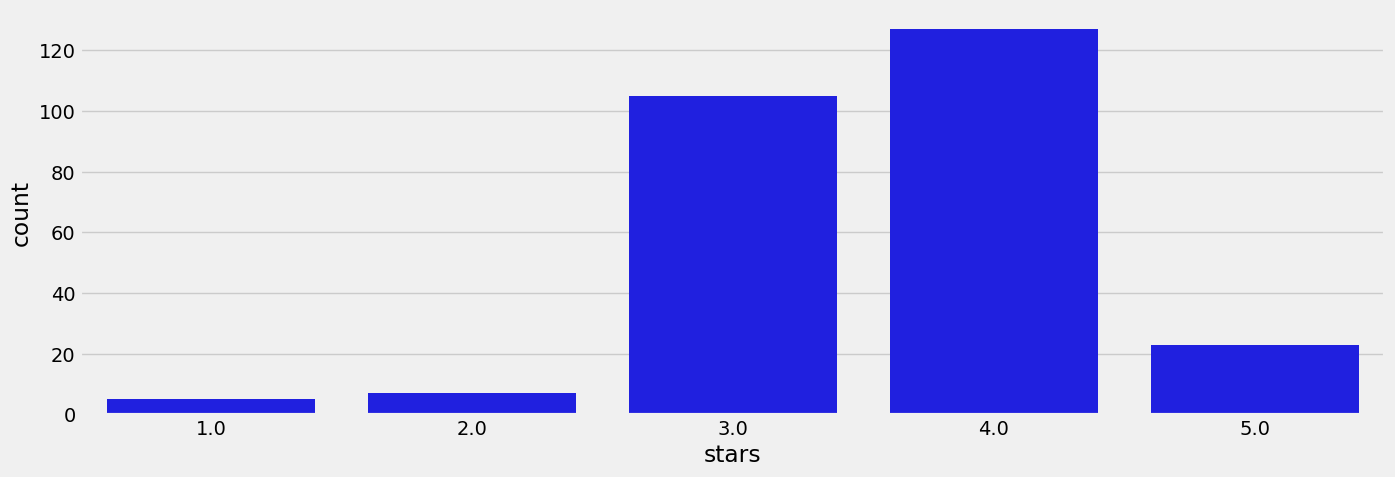

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x="stars", data=hotels_data, color='blue')

Dropping the hotel with no star rating for now

In [12]:
hotels_data = hotels_data.dropna(subset='stars')
hotels_data.isna().sum(axis=0)

our_hotel_id    0
name            0
review_score    0
stars           0
latitude        0
longitude       0
room_count      8
dtype: int64

### Room Counts

There are still 8 hotels with room counts that are nulls.

Plotting the histogram to see if there are any hotels with incorrect negative room count.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='room_count', ylabel='Count'>

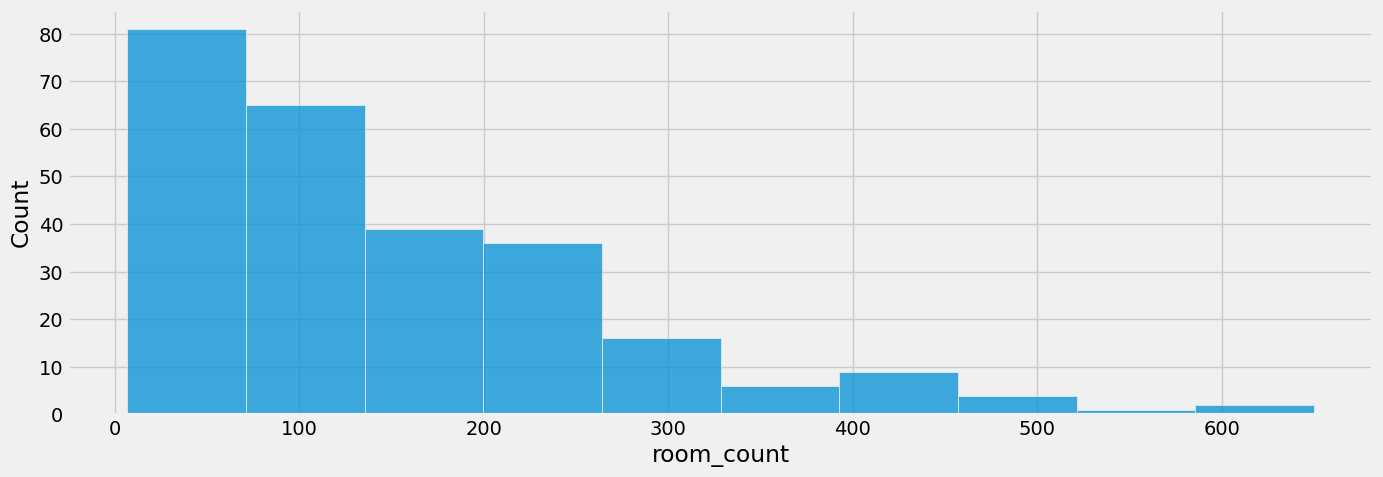

In [13]:
plt.figure(figsize=(15,5))
otels_data = hotels_data.dropna(subset='room_count')
sns.histplot(data = hotels_data, x = 'room_count', bins= 10)


In [14]:
hotels_data.isna().sum(axis=0)

our_hotel_id    0
name            0
review_score    0
stars           0
latitude        0
longitude       0
room_count      8
dtype: int64

### Star Rating vs Review Score

High Star ratings tend to higher review scores

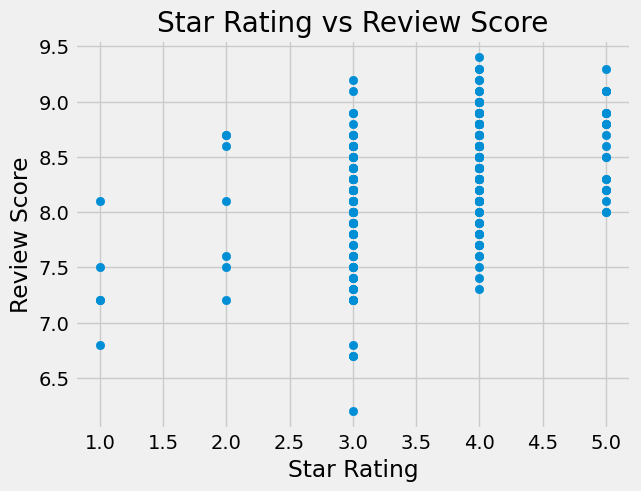

In [15]:
plt.scatter(hotels_data['stars'], hotels_data['review_score'])
plt.ylabel('Review Score')
plt.xlabel('Star Rating')
plt.title('Star Rating vs Review Score')
plt.show()

The heatmap visually confirms the moderate positive correlation between review scores and star ratings.

(3.5, -0.5)

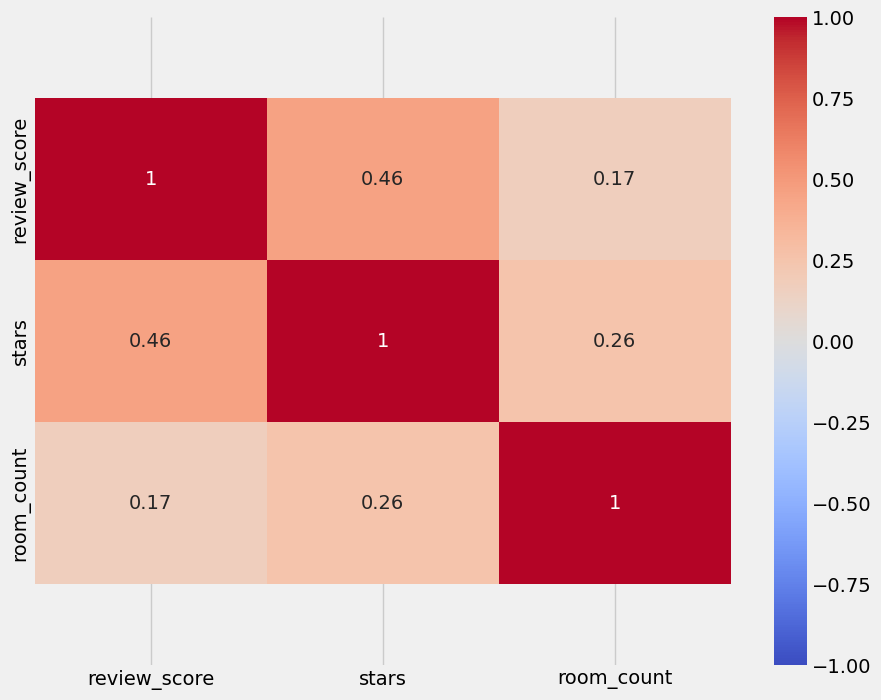

In [16]:
correlation_matrix = hotels_data.select_dtypes(include=['float64', 'int64'])[['review_score', 'stars', 'room_count']].corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Pricing Data

In [17]:
pricing_data.head(10)

,our_hotel_id,arrival_date,lead_time,room_name,meal_type_included,max_persons,price_value_ref,price_value_non_ref,is_sold_out
0,12112537,2021-01-23,1,Small Double Room,NONE,2.0,65.0,58.5,False
1,12112537,2021-01-24,2,Small Double Room,NONE,2.0,65.0,58.5,False
2,12112537,2021-01-25,3,Small Double Room,NONE,2.0,65.0,58.5,False
3,12112537,2021-01-26,4,Small Double Room,NONE,2.0,65.0,58.5,False
4,12112537,2021-01-27,5,Small Double Room,NONE,2.0,65.0,58.5,False
5,12112537,2021-01-28,6,Small Double Room,NONE,2.0,65.0,58.5,False
6,12112537,2021-01-29,7,Small Double Room,NONE,2.0,75.0,67.5,False
7,12112537,2021-01-30,8,Small Double Room,NONE,2.0,75.0,67.5,False
8,12112537,2021-01-31,9,Small Double Room,NONE,2.0,65.0,58.5,False
9,12112537,2021-02-01,10,Small Double Room,NONE,2.0,65.0,58.5,False


In [18]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   our_hotel_id         25380 non-null  int64  
 1   arrival_date         25380 non-null  object 
 2   lead_time            25380 non-null  int64  
 3   room_name            22756 non-null  object 
 4   meal_type_included   22756 non-null  object 
 5   max_persons          22756 non-null  float64
 6   price_value_ref      22597 non-null  float64
 7   price_value_non_ref  22756 non-null  float64
 8   is_sold_out          25380 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [19]:
pricing_data.describe()

,our_hotel_id,lead_time,max_persons,price_value_ref,price_value_non_ref
count,2.538000e+04,25380.00000,22756.000000,22597.000000,22756.000000
mean,4.409062e+06,45.50000,2.003955,134.851263,116.835683
std,2.667893e+06,25.97967,0.062766,99.877643,87.140762
min,3.162060e+06,1.00000,2.000000,35.000000,8.000000
25%,3.162859e+06,23.00000,2.000000,85.000000,73.600000
50%,3.169734e+06,45.50000,2.000000,111.000000,96.000000
75%,3.691493e+06,68.00000,2.000000,152.000000,131.400000
max,1.797598e+07,90.00000,3.000000,1113.000000,890.400000


In [20]:
pricing_data.isnull().sum()

our_hotel_id              0
arrival_date              0
lead_time                 0
room_name              2624
meal_type_included     2624
max_persons            2624
price_value_ref        2783
price_value_non_ref    2624
is_sold_out               0
dtype: int64

There are 159 missing refundable prices missing. 

Probably some hotels only offer non refundable prices or there are hotels that do not offer a refund, when booking closer to arrival date?

### Sold out analysis

When an hotel is sold out there is no information about room_name, if a meal is included, max_persons, and pricing

In [21]:
pricing_data['is_sold_out'].value_counts()

is_sold_out
False    22756
True      2624
Name: count, dtype: int64

Most of the missing data is when a room is sold out.

In [22]:
pricing_data[pricing_data['is_sold_out'] == True].isnull().sum()

our_hotel_id              0
arrival_date              0
lead_time                 0
room_name              2624
meal_type_included     2624
max_persons            2624
price_value_ref        2624
price_value_non_ref    2624
is_sold_out               0
dtype: int64

In [23]:
pricing_data['arrival_date'] = pd.to_datetime(pricing_data['arrival_date'])
pricing_data['week_number'] = (pricing_data['lead_time'] // 7) + 1
pricing_data['dayofweek'] = pricing_data['arrival_date'].dt.dayofweek
day_name_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
pricing_data['dayofweek_name'] = pricing_data['dayofweek'].map(day_name_mapping)
sold_out_data = pricing_data[pricing_data['is_sold_out'] == True]
pricing_data['month'] = pricing_data['arrival_date'].dt.month

4 Hotels are always sold out

In [24]:
sold_out_per_id = sold_out_data.groupby('our_hotel_id')['is_sold_out'].count().reset_index()
sold_out_per_id['our_hotel_id'][sold_out_per_id['is_sold_out'] == 90].to_list()

[3167784, 3169398, 3169704, 17975980]

The trend is that the closer we book to arrival time, the more rooms are sold out

There is some seasonality: higher number of rooms are sold out every week on certain days.

As shown below, probably these days are the weekends.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


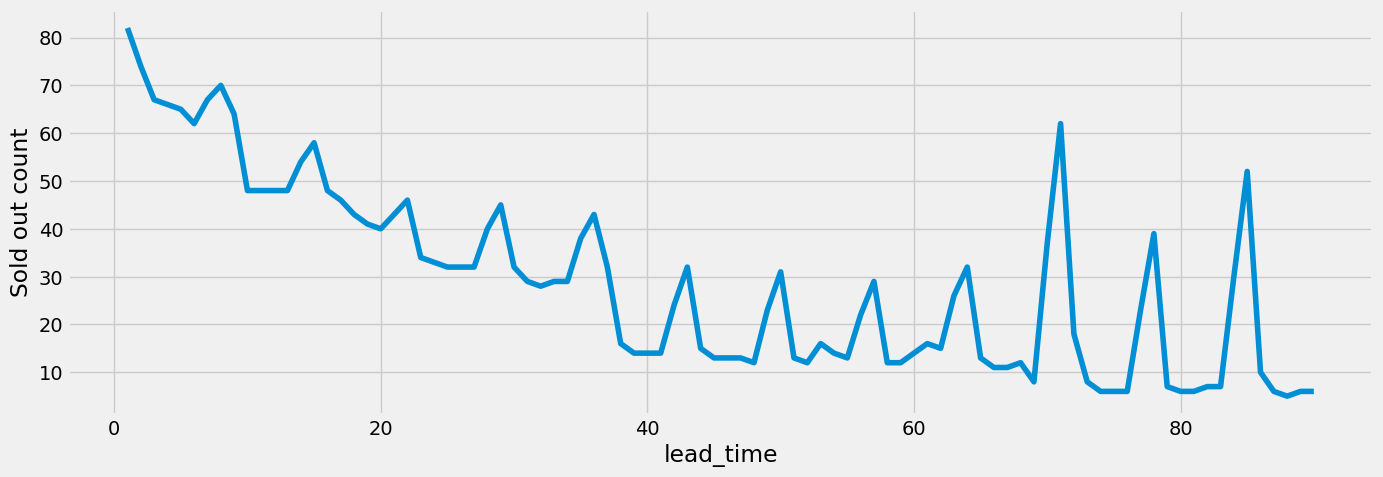

In [25]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x=sold_out_data['lead_time'].value_counts().index, y = sold_out_data['lead_time'].value_counts().values).set_ylabel('Sold out count')

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


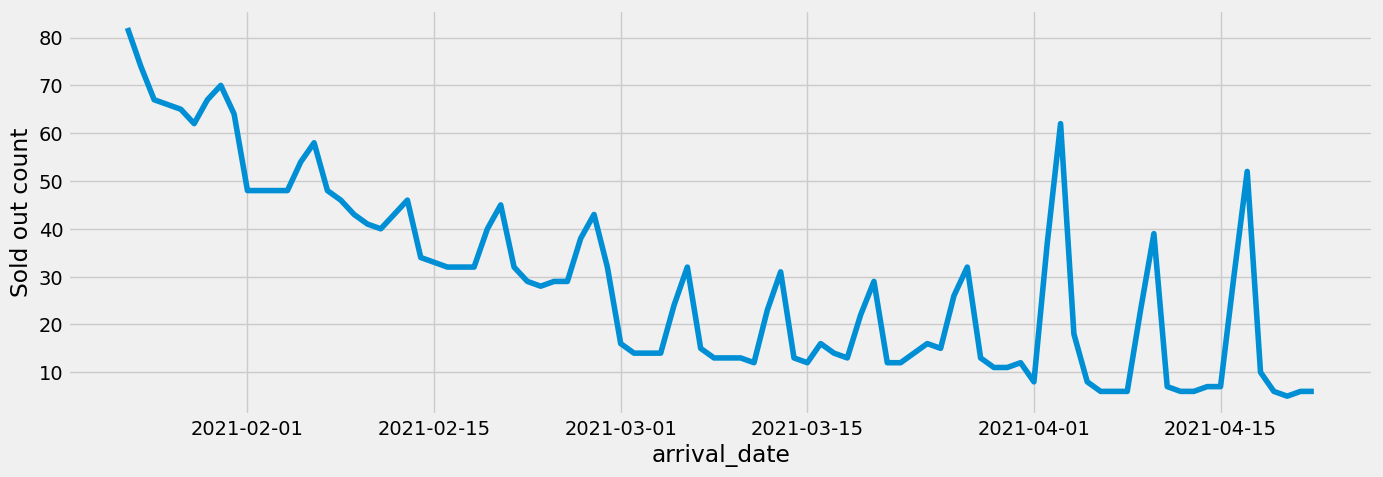

In [26]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x=sold_out_data['arrival_date'].value_counts().index, y = sold_out_data['lead_time'].value_counts().values).set_ylabel('Sold out count')

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Lineplot')

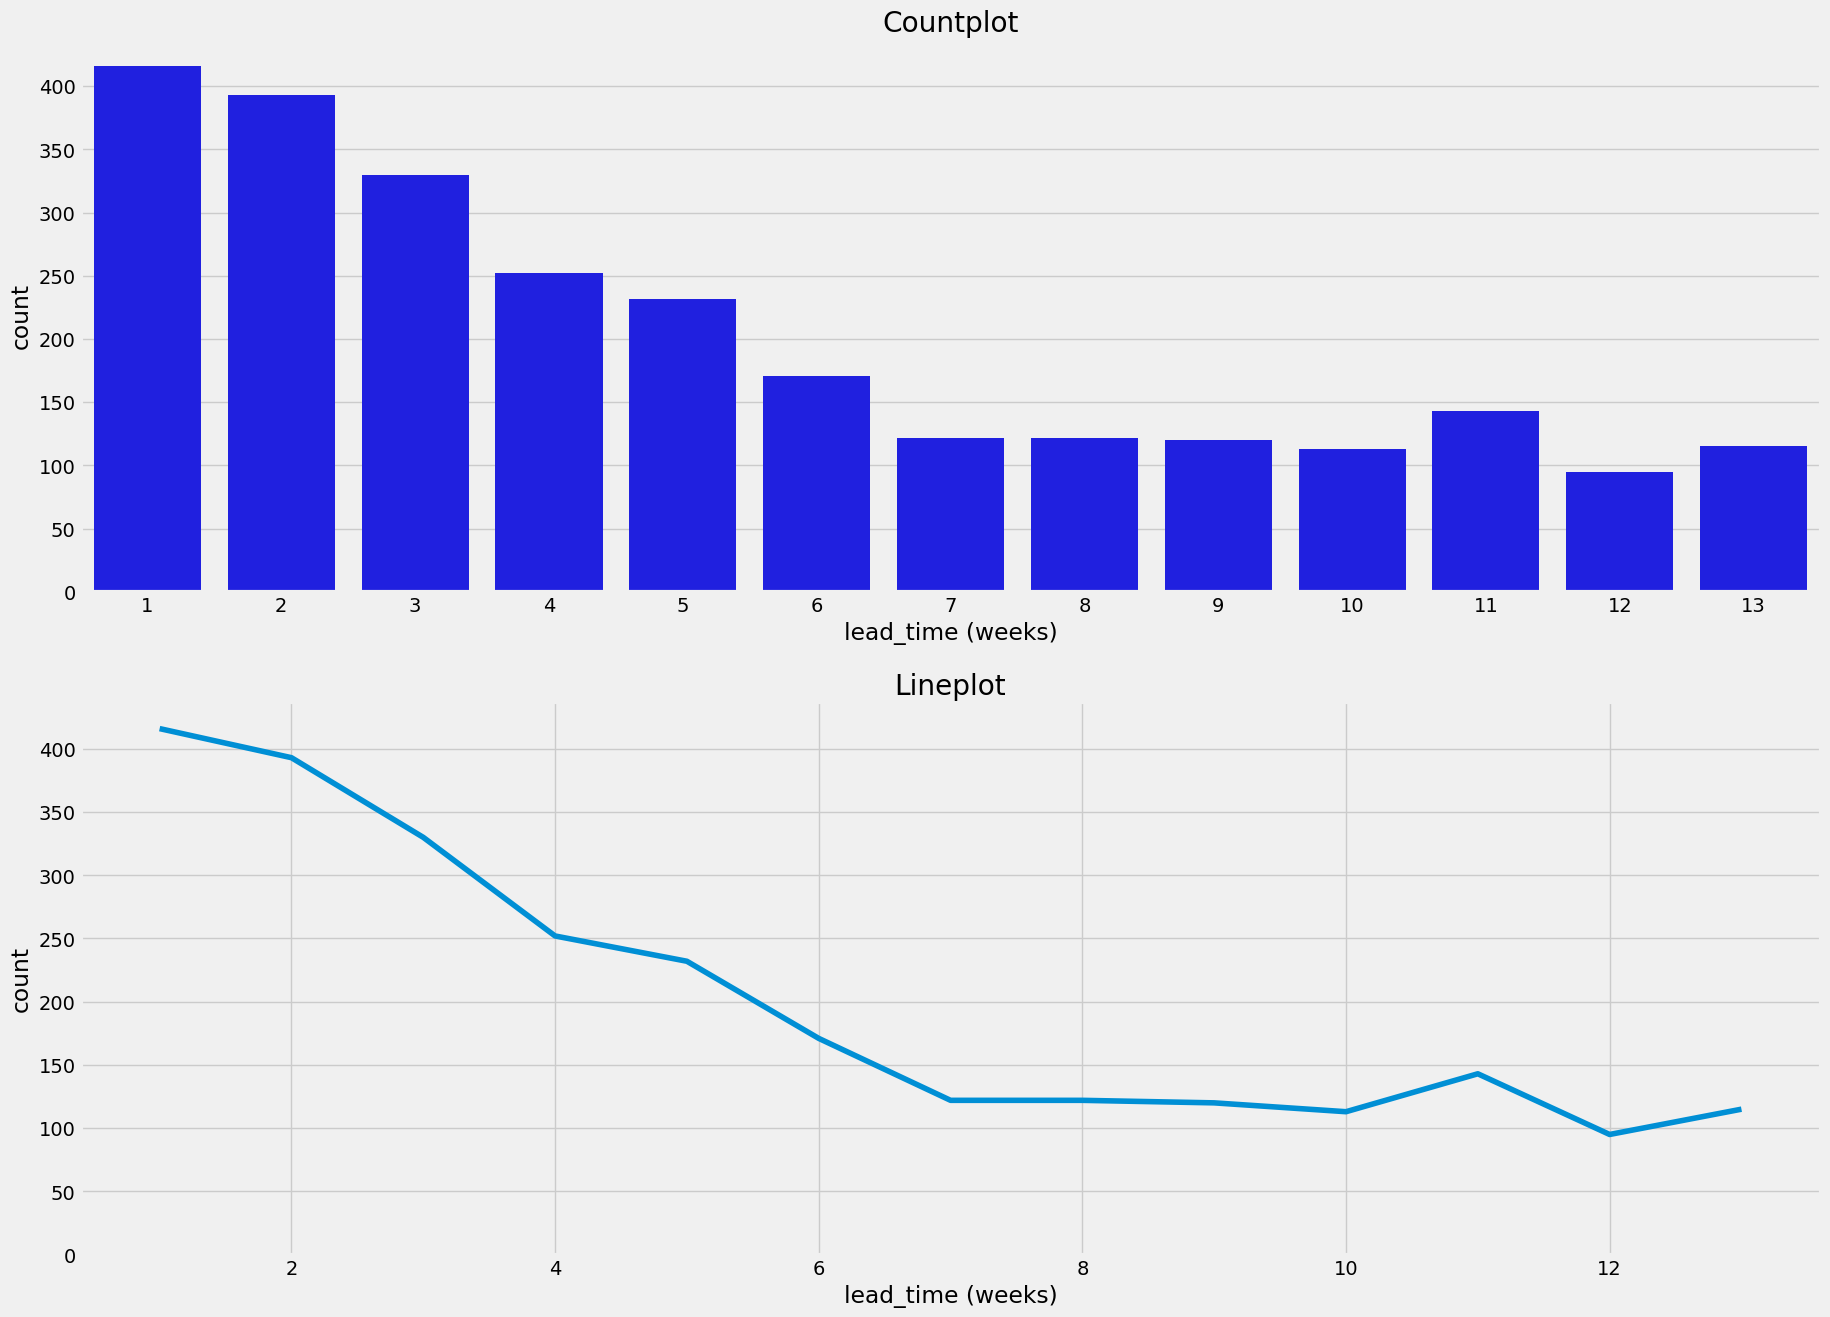

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15), sharey=True)
sns.countplot(ax=axes[0], x="week_number", data=sold_out_data, color='blue')
axes[0].set_title('Countplot')
axes[0].set_xlabel('lead_time (weeks)')
sns.lineplot(ax=axes[1], x=sold_out_data['week_number'].value_counts().index, y = sold_out_data['week_number'].value_counts().values)
axes[1].set_ylabel('count')
axes[1].set_xlabel('lead_time (weeks)')
axes[1].set_title('Lineplot')

Most rooms are sold out in the weekend

<Axes: xlabel='dayofweek_name', ylabel='count'>

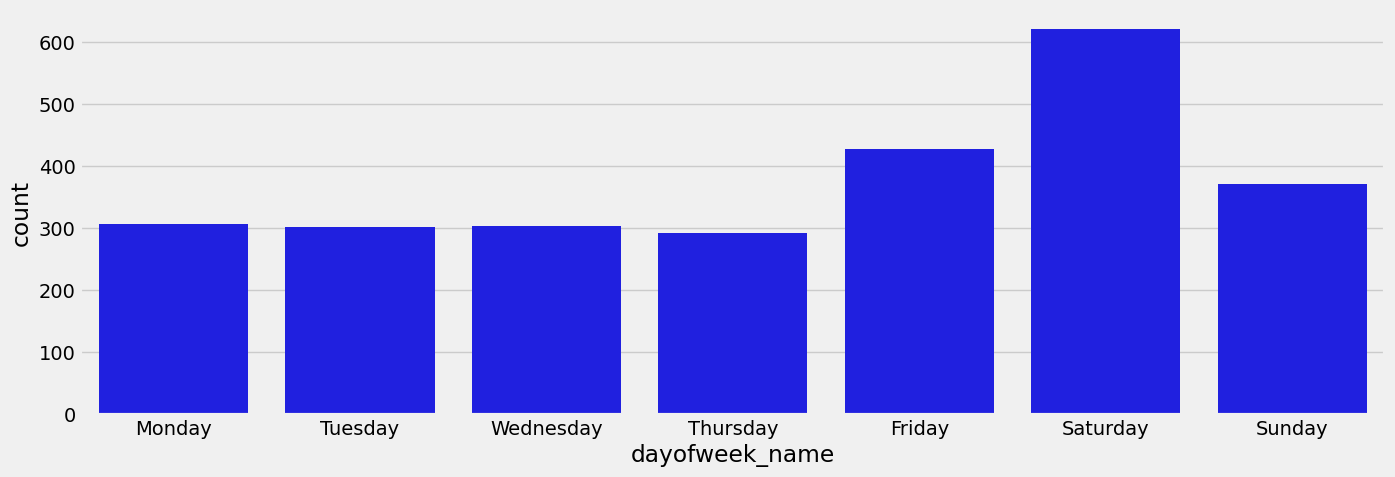

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='dayofweek_name', data=sold_out_data, color='blue',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Non refundable hotels

There are 159 missing refundable prices missing. 



37 hotels do not offer refundable prices when booking in the week before the arrival

In [29]:
non_ref_hotels = pricing_data[(pricing_data['is_sold_out'] == False) & pricing_data['price_value_ref'].isna()]
len(non_ref_hotels['our_hotel_id'].unique())

37

In [30]:
non_ref_hotels.groupby('our_hotel_id')['lead_time'].apply(list).reset_index()

,our_hotel_id,lead_time
0,3162115,"[1, 2, 3, 4, 5, 6]"
1,3162125,"[1, 2, 3]"
2,3162255,"[1, 2, 3, 4]"
3,3162265,"[1, 2, 3, 4, 5]"
4,3162330,"[1, 2, 3, 4]"
5,3162345,"[1, 2, 3, 4, 5]"
6,3162485,"[1, 2, 3]"
7,3162565,"[1, 2, 3]"
8,3162650,"[1, 2, 3, 4]"
9,3162690,"[1, 2, 3, 4]"


<Axes: xlabel='lead_time', ylabel='count'>

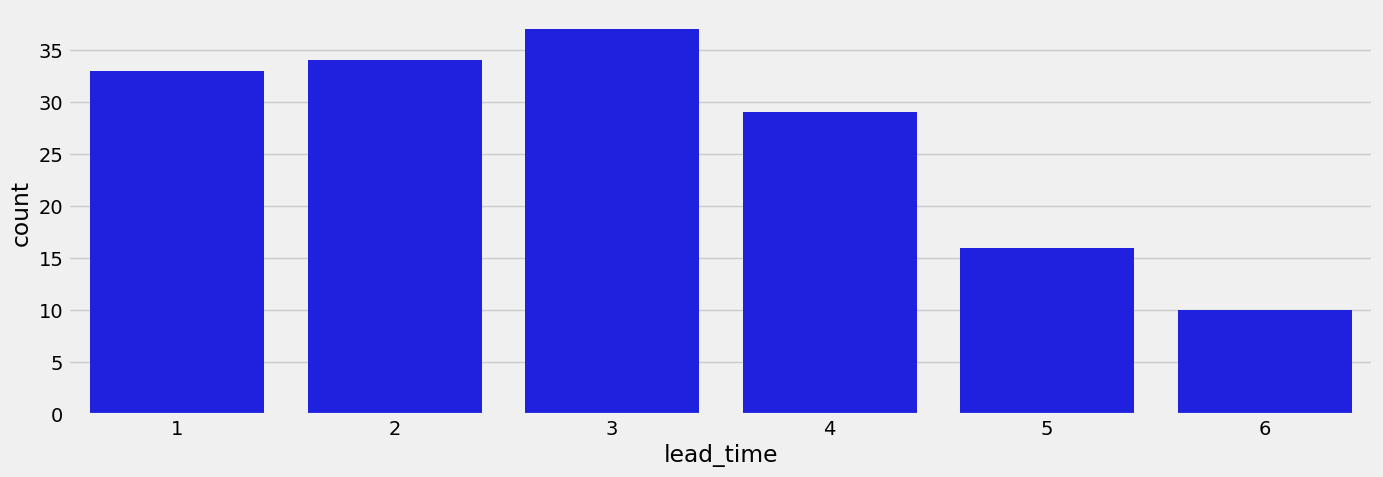

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x="lead_time", data=non_ref_hotels, color='blue')

### Room Types

Most Hotel have rooms with a max of two people.

Missing data is from hotels that are fully booked for the 90 days period

In [32]:
room_types = pricing_data.groupby('our_hotel_id')['max_persons'].max().reset_index()
room_types['max_persons'].value_counts(dropna=False)

max_persons
2.0    277
NaN      4
3.0      1
Name: count, dtype: int64

Showing top 10 room types

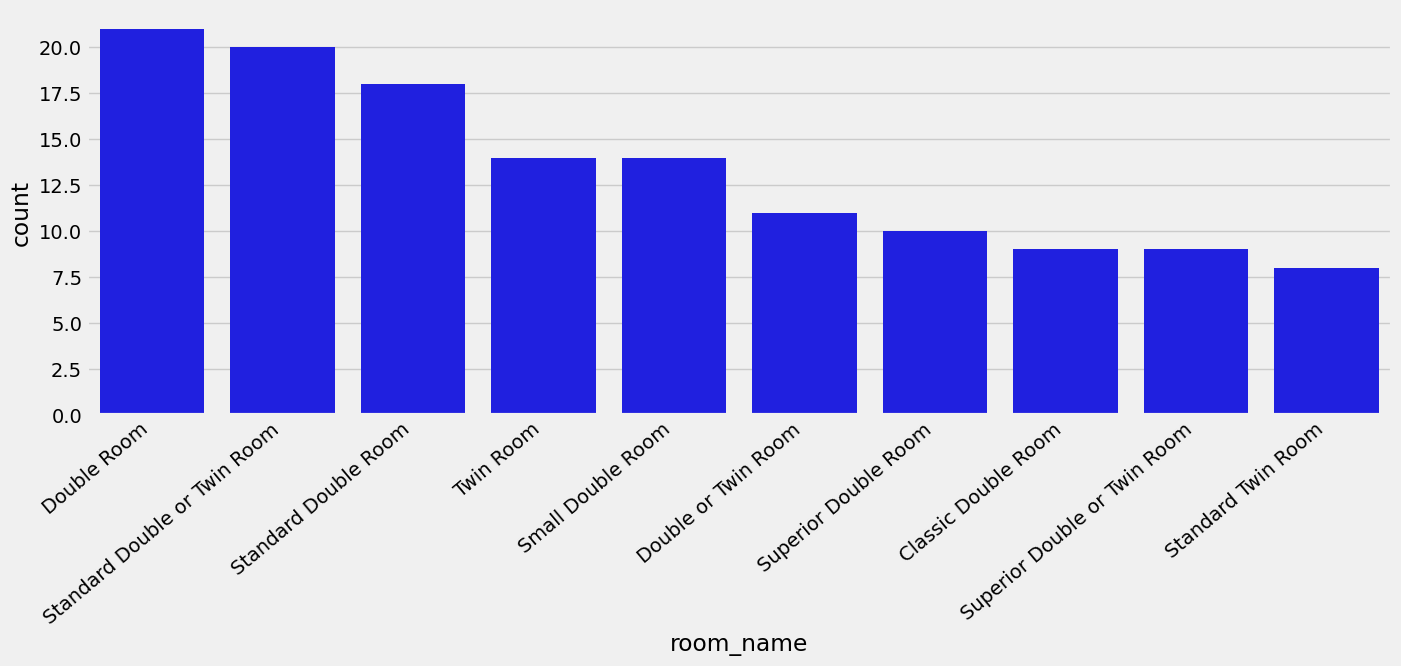

In [33]:
room_names_by_hotel_id = pricing_data.dropna(subset='room_name').groupby('our_hotel_id')['room_name'].first().reset_index()
room_type_distribution = room_names_by_hotel_id['room_name'].value_counts()
top_10_room_types = room_type_distribution.head(10).reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(data=top_10_room_types, x = 'room_name', y='count', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Meal type

In [34]:
# dropping the nones that correspond to the 4 hotels that are always sold out and have no information regarding meal types

meal_types = pricing_data.groupby('our_hotel_id')['meal_type_included'].first().reset_index().dropna()

Vast majority of hotels do not offer a meal

<Axes: xlabel='meal_type_included', ylabel='count'>

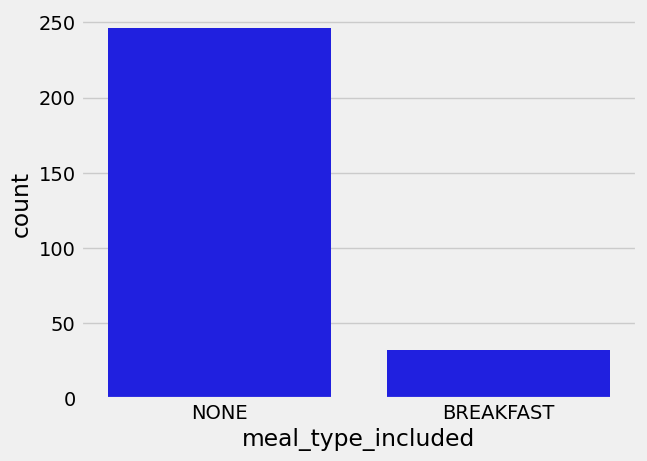

In [35]:
sns.countplot(data = meal_types, x = 'meal_type_included', color='blue')

### Pricing

The trend is that the pricing goes up the earlier we book.

There is seasonality: it cheaper to book on certain week days rather than others?

/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/1942420594.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pricing_data, x='lead_time', y = 'price_value_ref', ci=None)
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time', ylabel='price_value_ref'>

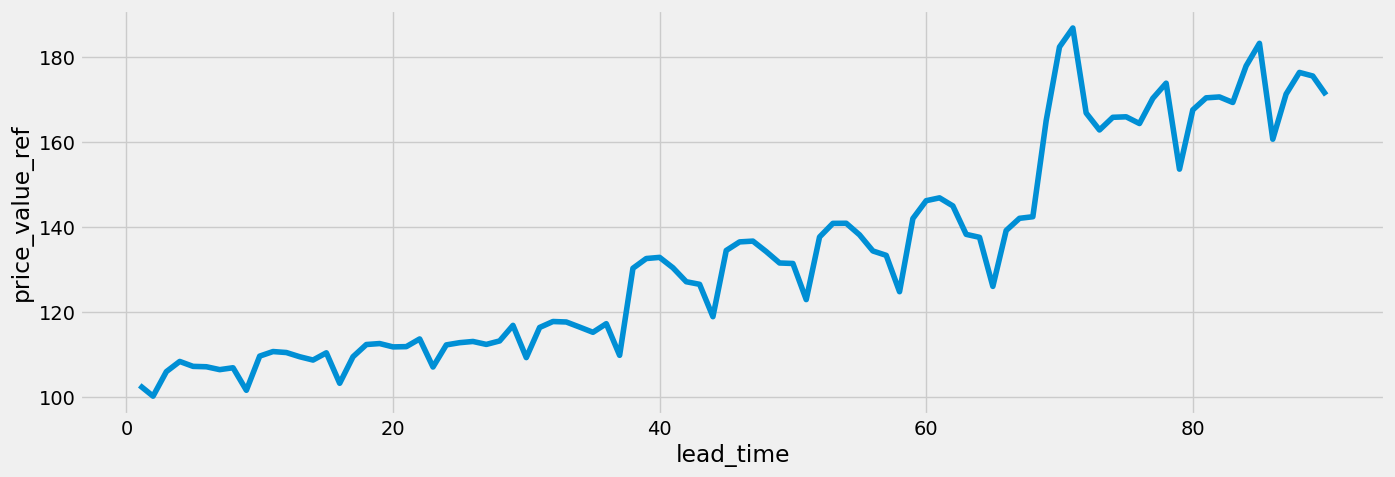

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(data=pricing_data, x='lead_time', y = 'price_value_ref', ci=None)

Booking without refund is a bit cheaper

/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/2907741512.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pricing_data, x='lead_time', y = 'price_value_non_ref', ci=None)
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time', ylabel='price_value_non_ref'>

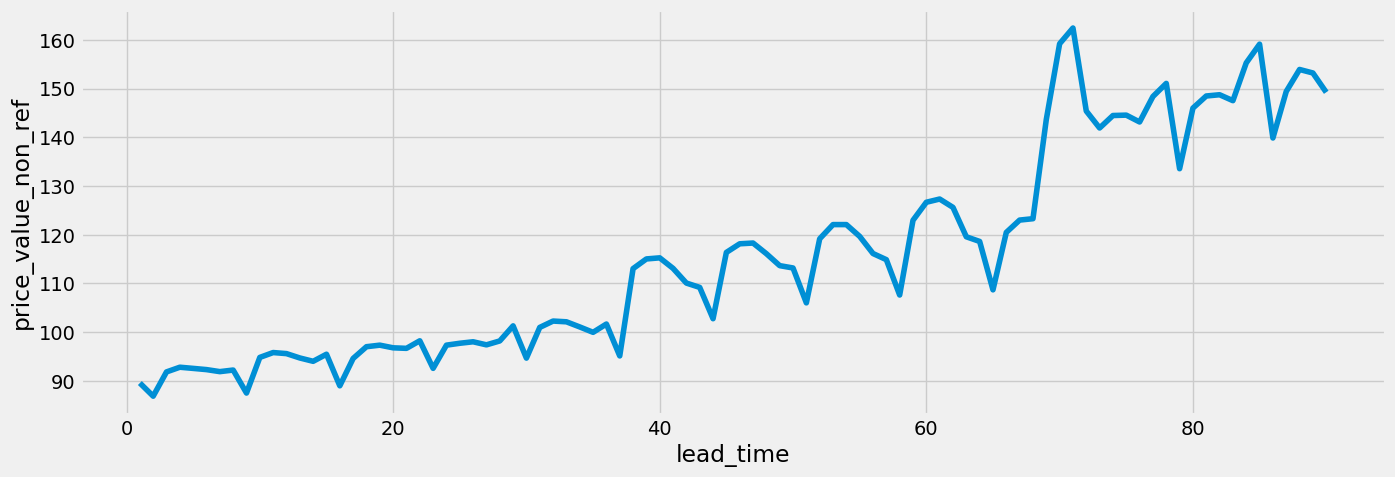

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(data=pricing_data, x='lead_time', y = 'price_value_non_ref', ci=None)

# Market Comparison

### Finding hotels location

from https://stackoverflow.com/questions/69409255/how-to-get-city-state-and-country-from-a-list-of-latitude-and-longitude-coordi

In [38]:
geolocator = Nominatim(user_agent="abcd")

def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

hotels_data = hotels_data.progress_apply(city_state_country, axis=1)
hotels_data['country'].value_counts(dropna=False)

  0%|          | 0/267 [00:00<?, ?it/s]

country
Nederland                      166
België / Belgique / Belgien    101
Name: count, dtype: int64

In [39]:
hotels_data.replace({'Nederland' : 'Netherlands', 'België / Belgique / Belgien' : 'Belgium'}, inplace=True)

The 2 markets are Belgium and Netherlands

In [40]:
pricing_data = pricing_data.merge(hotels_data[['our_hotel_id', 'country']], on='our_hotel_id', how='inner')

In [41]:
be_hotels_data = pricing_data[pricing_data['country'] == 'België / Belgique / Belgien']
nl_hotels_data = pricing_data[pricing_data['country'] == 'Nederland']

### How many hotels are available per arrival date in the next 90 days?

Hotels are in bigger in the Netherlands.

And the total number of rooms in the Netherlands is almost double that of Belgium

In [42]:
print('Total rooms:\n', hotels_data.groupby('country')['room_count'].sum().reset_index())
print('Average hotel size:\n', hotels_data.groupby('country')['room_count'].mean().round())

Total rooms:
        country  room_count
0      Belgium     13361.0
1  Netherlands     24969.0
Average hotel size:
 country
Belgium        134.0
Netherlands    157.0
Name: room_count, dtype: float64


In [43]:
available_hotels = pricing_data[pricing_data['is_sold_out'] == False]
available_hotels.sort_values(by='country', inplace= True)

/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/1984143551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_hotels.sort_values(by='country', inplace= True)


In [44]:
def make_subsets(df):
    df['arrival_date'] = pd.to_datetime(df['arrival_date'])
    first_arrival_date = df['arrival_date'].min()
    date_range_1 = (first_arrival_date, first_arrival_date + pd.Timedelta(days=30))
    date_range_2 = (first_arrival_date + pd.Timedelta(days=31), first_arrival_date + pd.Timedelta(days=60))
    date_range_3 = (first_arrival_date + pd.Timedelta(days=61), first_arrival_date + pd.Timedelta(days=90))
    df['date'] = df['arrival_date'].dt.to_period(freq="D")
    subset_1 = df[(df['arrival_date'] >= date_range_1[0]) & (df['arrival_date'] <= date_range_1[1])]
    subset_2 = df[(df['arrival_date'] >= date_range_2[0]) & (df['arrival_date'] <= date_range_2[1])]
    subset_3 = df[(df['arrival_date'] >= date_range_3[0]) & (df['arrival_date'] <= date_range_3[1])]
    
    return subset_1, subset_2, subset_3

In [45]:
av_hotels_by_country_and_date = available_hotels.groupby(['country', 'arrival_date'])['is_sold_out'].size().reset_index()
hotels_by_country = hotels_data['country'].value_counts().reset_index()
hotels_by_country.columns = ['country', 'total_count']
merged_df = pd.merge(av_hotels_by_country_and_date, hotels_by_country, on='country')
merged_df['pct'] = (merged_df['is_sold_out'] * 100)/merged_df['total_count']

In [46]:
subset_1, subset_2, subset_3 = make_subsets(available_hotels)
pct_subset_1,pct_subset_2, pct_subset_3 = make_subsets(merged_df)

/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/447099104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date'] = pd.to_datetime(df['arrival_date'])
/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/447099104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['arrival_date'].dt.to_period(freq="D")


In [47]:
def make_availability_plot(tot_subset, pct_subset):
    fig, axes = plt.subplots(1, 2, figsize=(20, 15), sharey=True)
    sns.countplot(ax=axes[0], data =tot_subset, y='date', hue='country', orient='h')
    sns.barplot(ax=axes[1], data =pct_subset, y='date', x = 'pct' , hue='country', orient='h')
    axes[0].set_xlabel('# of Available rooms')
    axes[1].set_xlabel('%  of Available rooms')
    lines_labels = [axes[1].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, loc='upper center', ncol=4)
    axes[0].get_legend().remove()
    axes[1].get_legend().remove()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the combined legend
    plt.show()


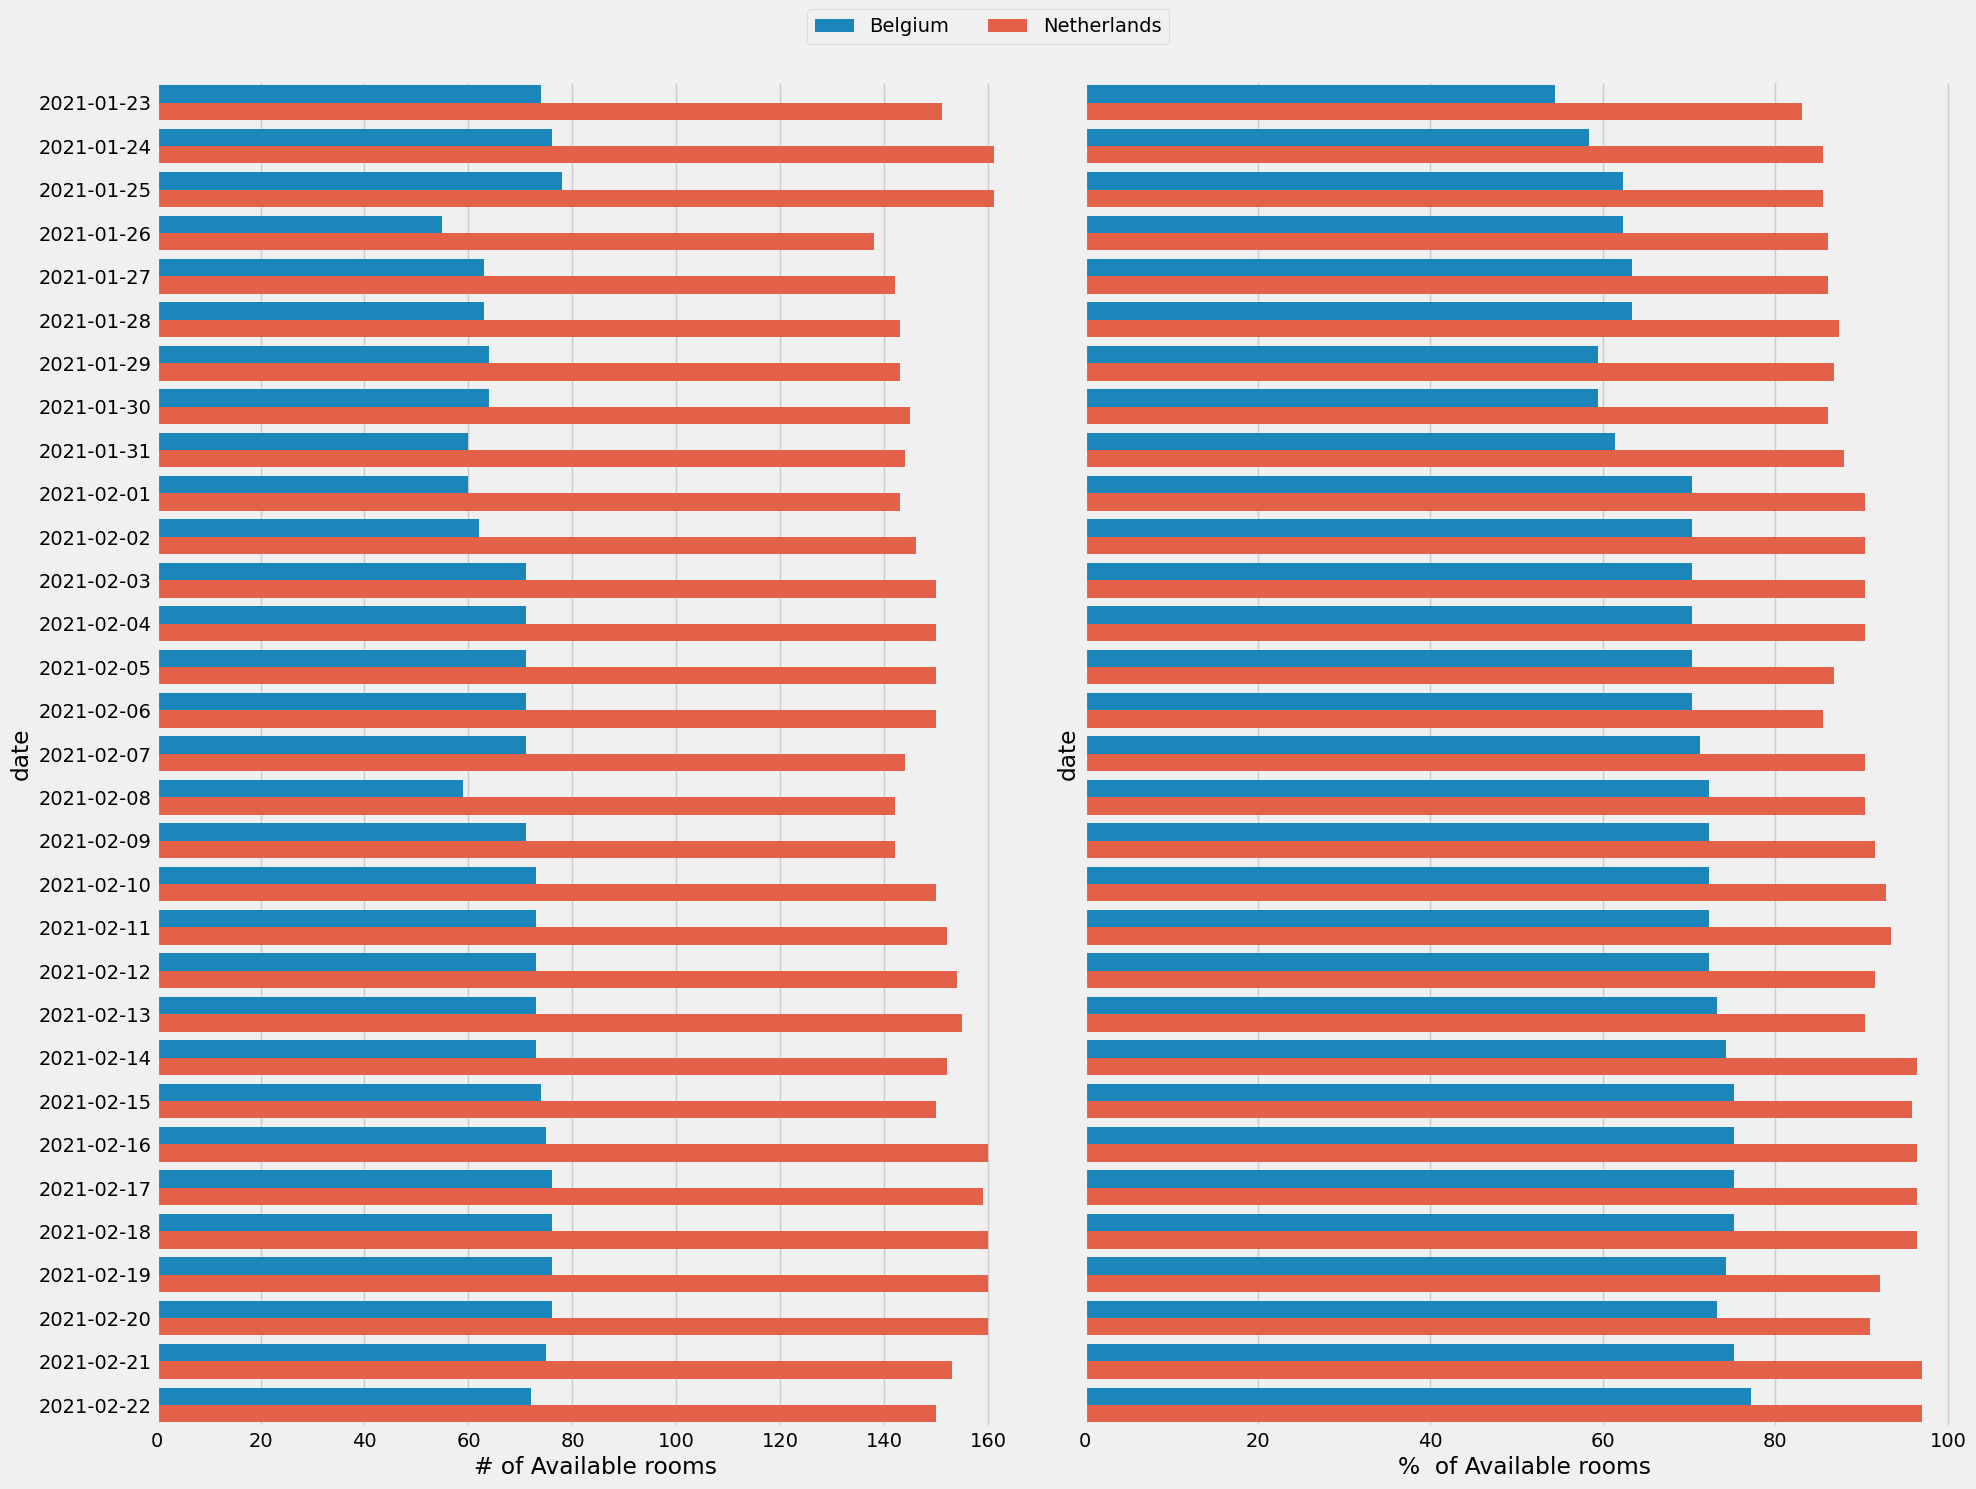

In [48]:
make_availability_plot(subset_1, pct_subset_1)

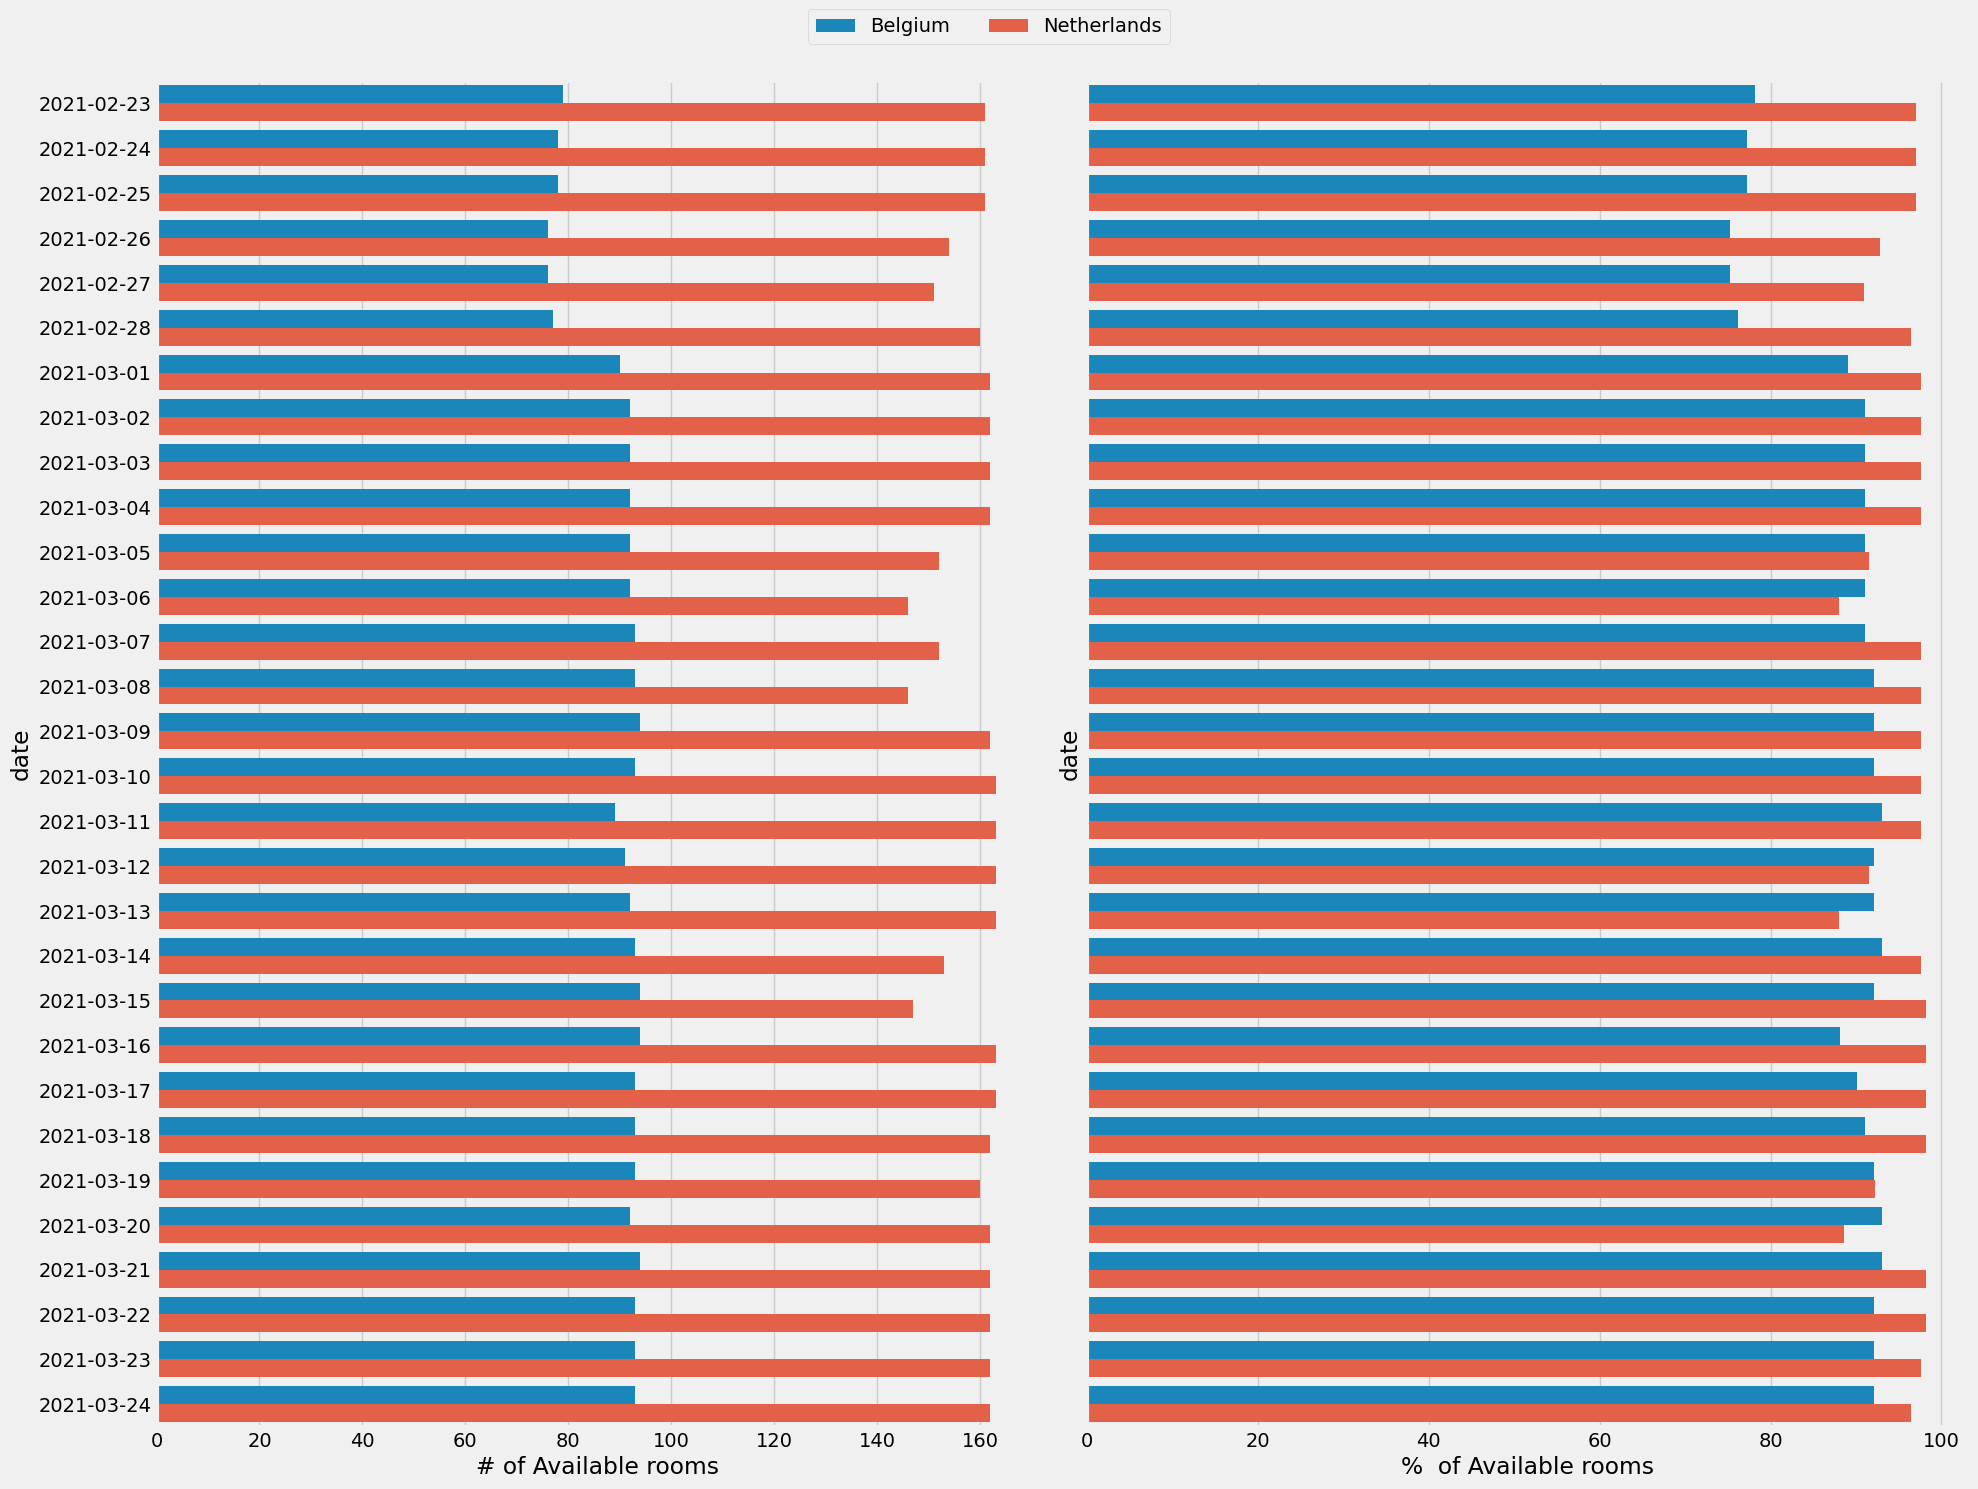

In [49]:
make_availability_plot(subset_2, pct_subset_2)

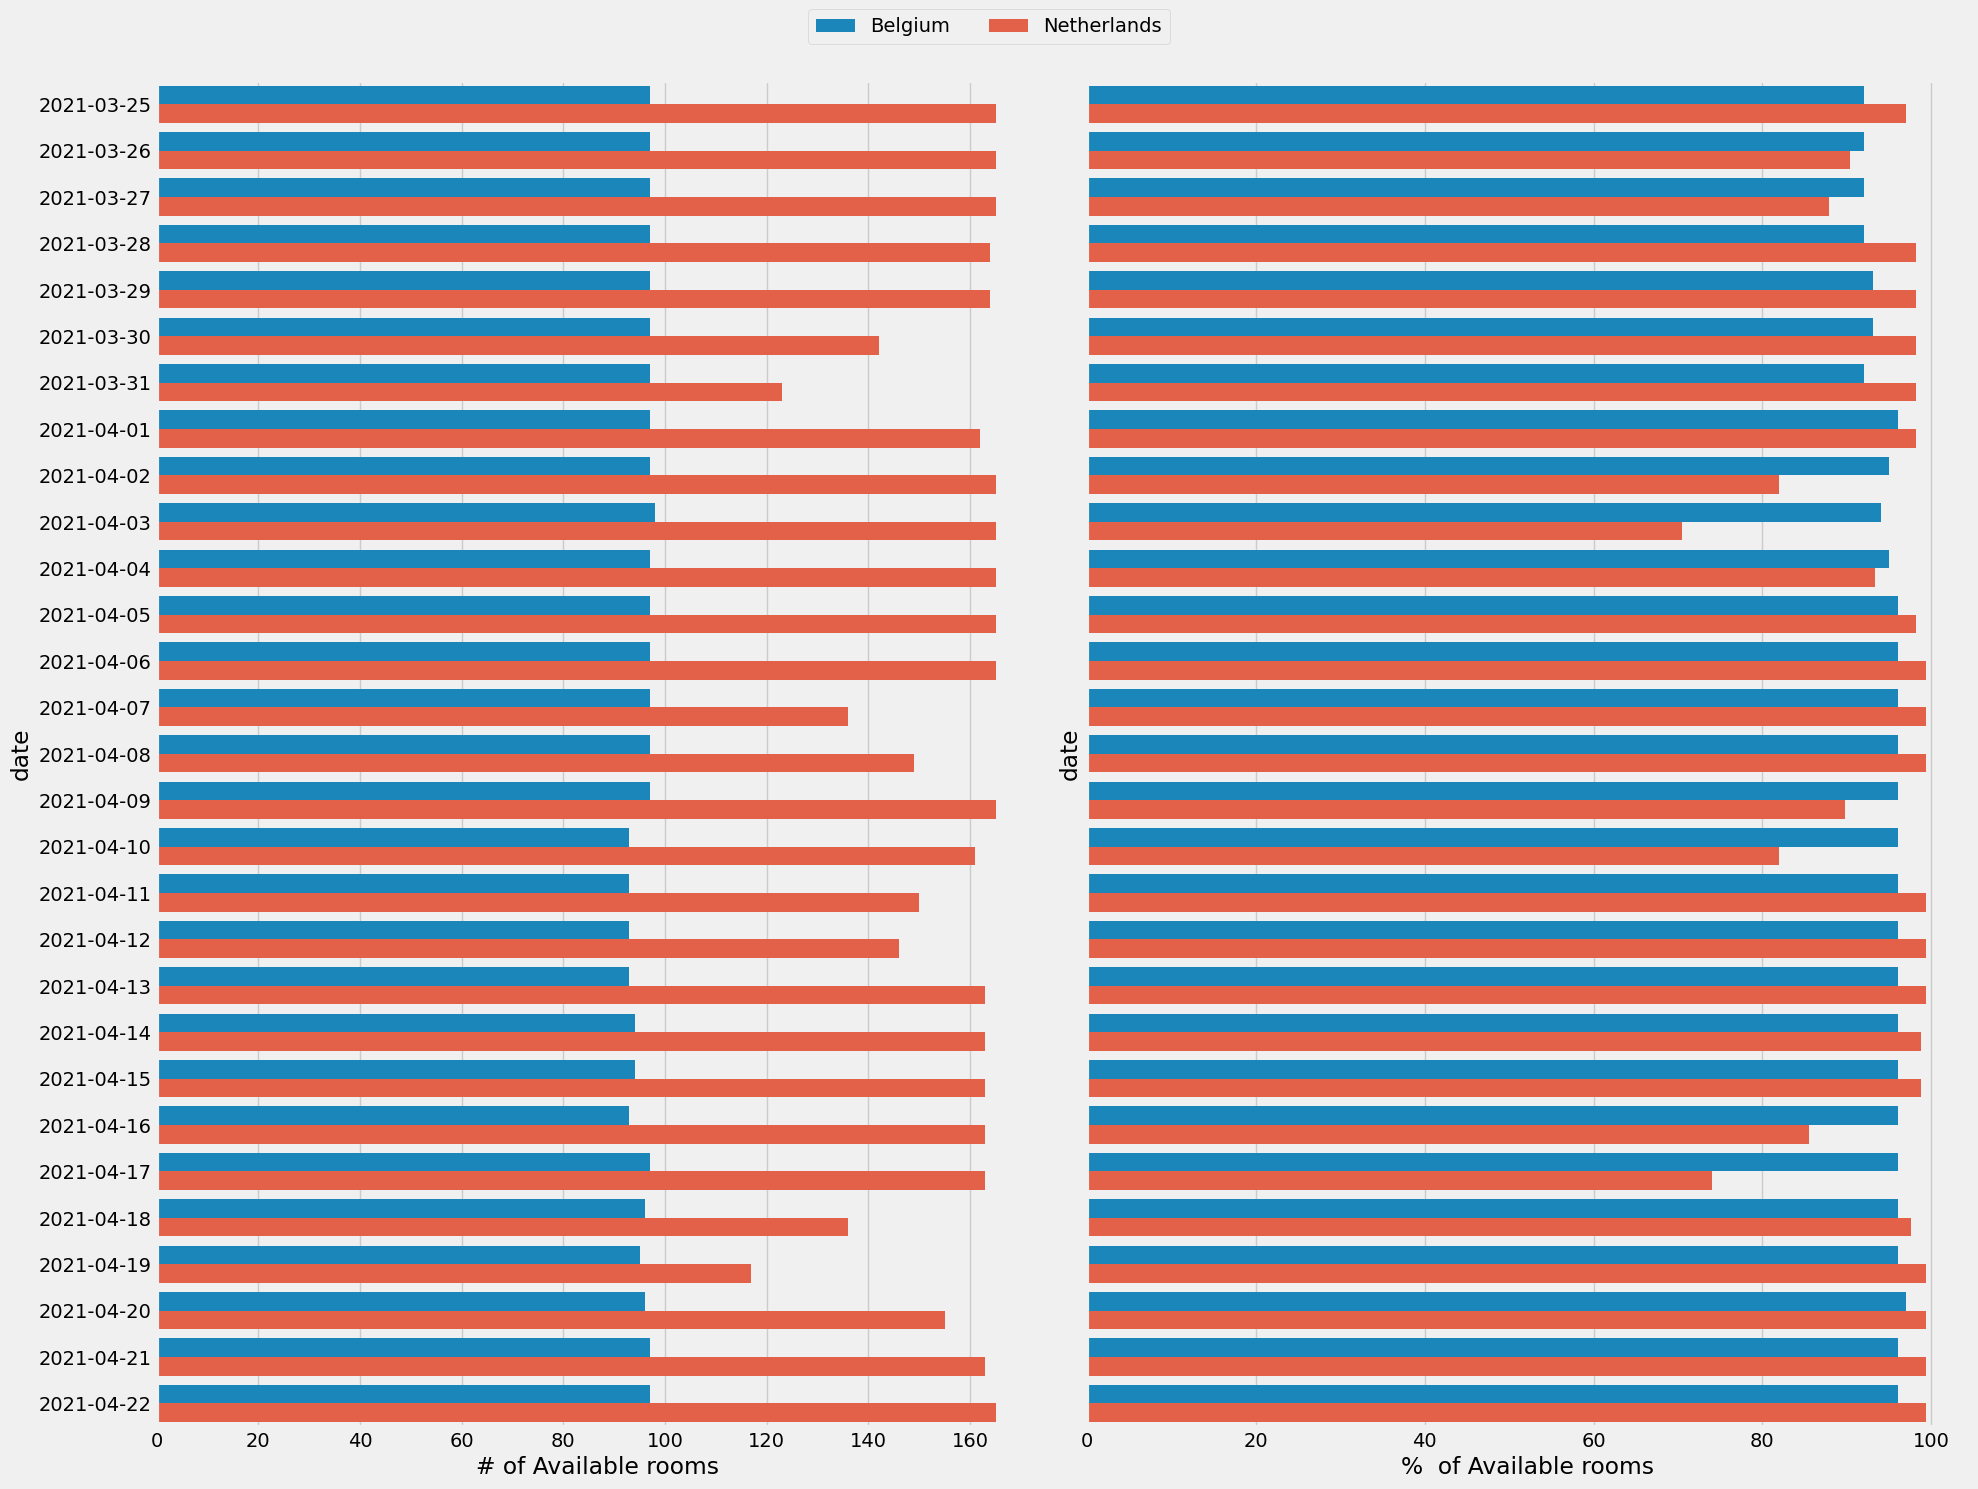

In [50]:
make_availability_plot(subset_3, pct_subset_3)

In [51]:
df = available_hotels.groupby(['country', 'arrival_date'])['is_sold_out'].count().reset_index()

Often there are more rooms available in the Netherlands compared to Belgium

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


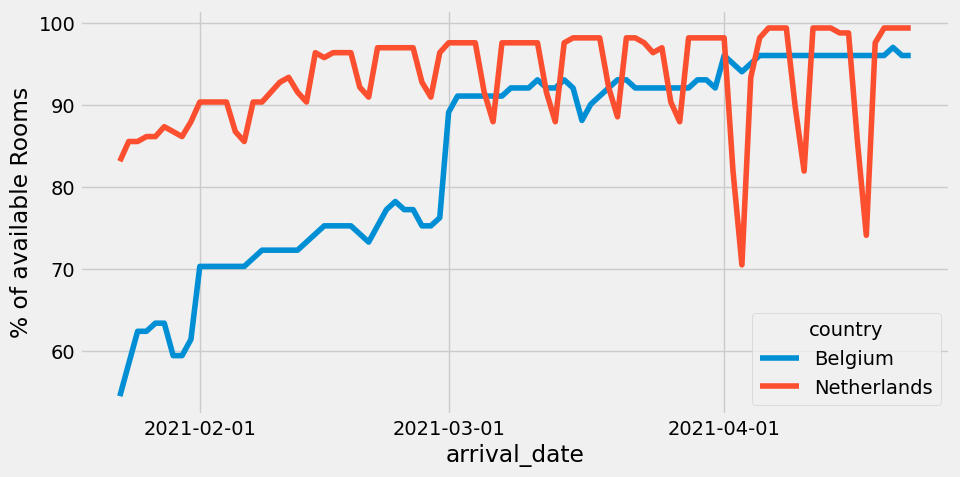

In [52]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=merged_df, x = 'arrival_date', y='pct', hue='country', errorbar=('ci', False))
ax.set_ylabel('% of available Rooms')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


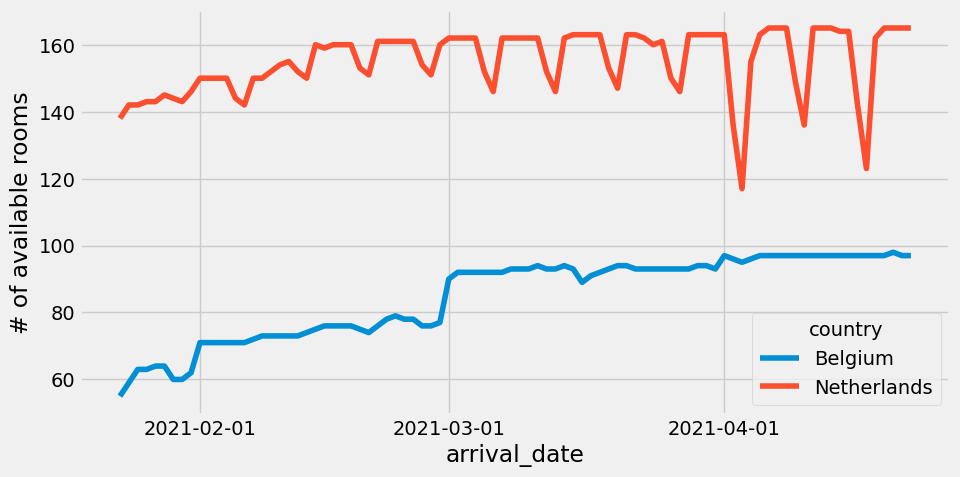

In [53]:
from matplotlib.dates import WeekdayLocator
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df, x = 'arrival_date', y='is_sold_out', hue='country', errorbar=('ci', False))
ax.set_ylabel('# of available rooms')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

There are more rooms available in the Netherlands day by day in the next 90 days

By looking at the city field I created, most Hotels in the Netherlands are in Amsterdam.

Fact that Amsterdam is a much bigger tourist city than Brussels/Belgium, means it has bigger and more hotels?

In [54]:
print(df.groupby('country')['is_sold_out'].mean().round(),'\n')
print('City value counts:\n', hotels_data.city.value_counts(dropna=False))


country
Belgium         85.0
Netherlands    155.0
Name: is_sold_out, dtype: float64 

City value counts:
 city
Amsterdam                 145
                           82
Bruxelles - Brussel        39
Amsterdam-Duivendrecht      1
Name: count, dtype: int64


There is definitely seasonality in the rooms available in Amsterdam.

The deeps probably correspond to weekends.

As found out above less rooms are available during the weekend.

One of the big deeps is a the Start of April.

Easter in 2021 was 4th of April. 

Easter holidays attract a lot of tourists.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/dt/md6yhwd512z8l2whxmpl9p1c0000gn/T/ipykernel_10562/138533779.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(18714.0, 0, '2021-03-28'),
 Text(18715.0, 0, '2021-03-29'),
 Text(18716.0, 0, '2021-03-30'),
 Text(18717.0, 0, '2021-03-31'),
 Text(18718.0, 0, '2021-04-01'),
 Text(18719.0, 0, '2021-04-02'),
 Text(18720.0, 0, '2021-04-03'),
 Text(18721.0, 0, '2021-04-04'),
 Text(18722.0, 0, '2021-04-05'),
 Text(18723.0, 0, '2021-04-06')]

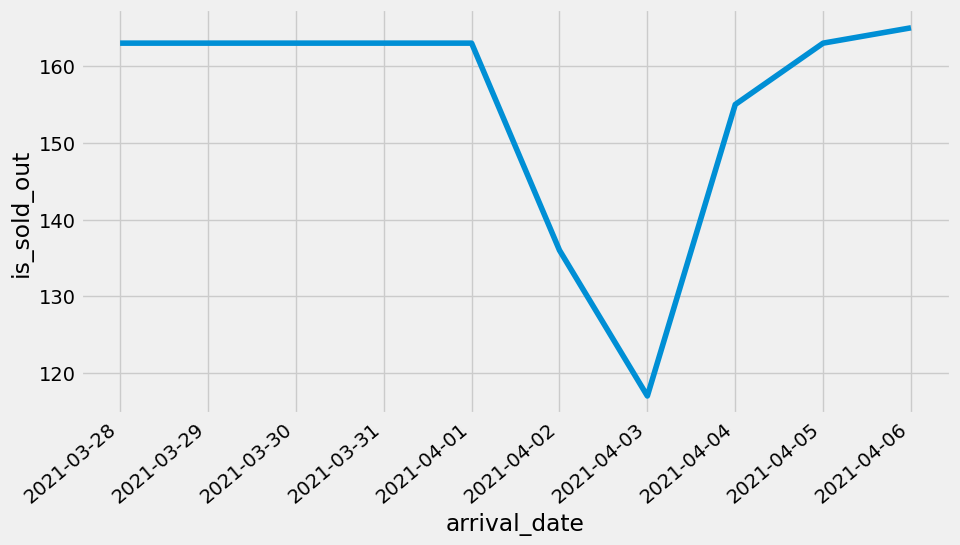

In [66]:
from matplotlib.dates import WeekdayLocator
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df[(df['arrival_date']>'2021-03-27') & (df['arrival_date'] < '2021-04-07') & (df['country'] == 'Netherlands')],
              x = 'arrival_date', y='is_sold_out', errorbar=('ci', False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### What are the overall pricing patterns?

The further you are to the arrival date, the more expensive it is to book in the Netherlands.

Belgium does not have this trend.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time', ylabel='price_value_non_ref'>

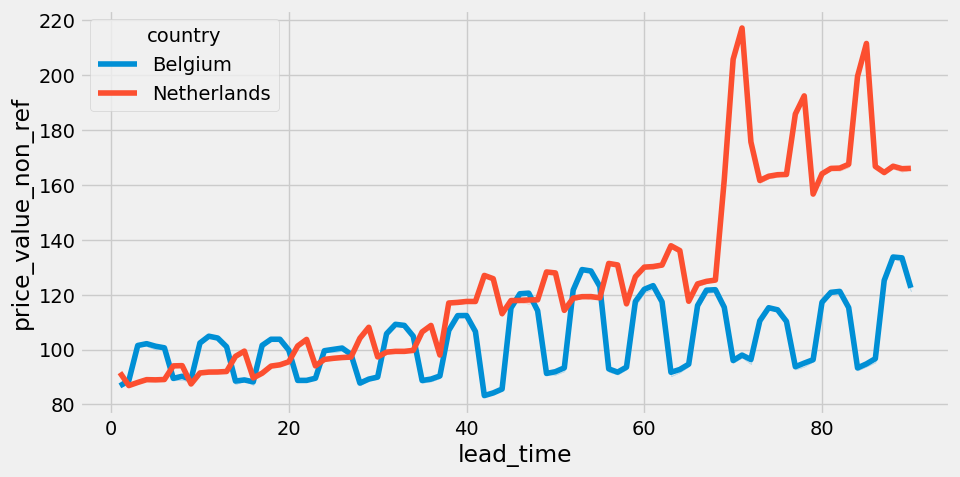

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(data=available_hotels, x = 'lead_time', y='price_value_non_ref', hue='country', errorbar=('ci', False))

Both markets have a seasonality where it is cheaper to book on certain weekdays.


There is a spike of pricing in Amsterdam at the end of March.

This corresponds to Easter week in 2021 

Also end of winter and arrival of good weather season probably contributes to this hike in pricing.

/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giorgiotacchella/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


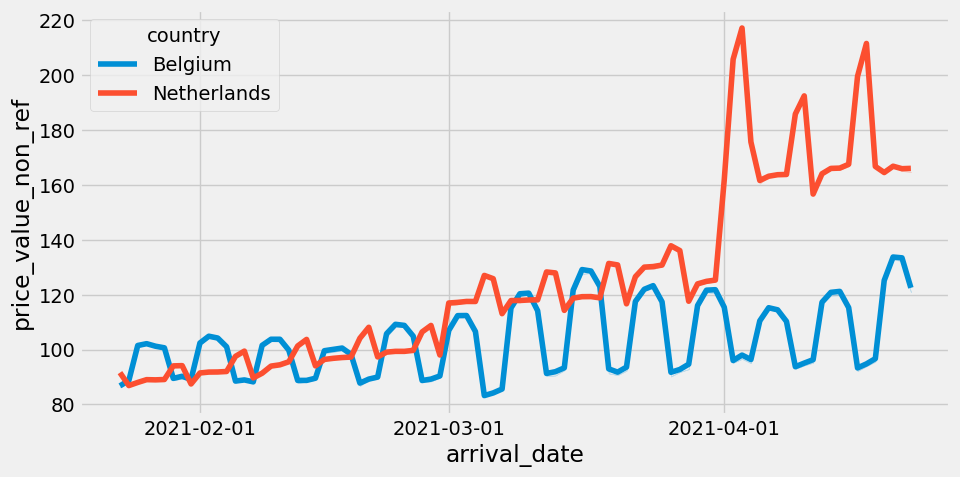

In [59]:

plt.figure(figsize=(10,5))
sns.lineplot(data=available_hotels, x = 'arrival_date', y='price_value_non_ref', hue='country', errorbar=('ci', False))
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

### Stars and reviews

Average star rating by country

In [73]:
hotels_data.groupby('country')['stars'].mean().reset_index()

,country,stars
0,Belgium,3.485149
1,Netherlands,3.644578


<Axes: xlabel='stars', ylabel='count'>

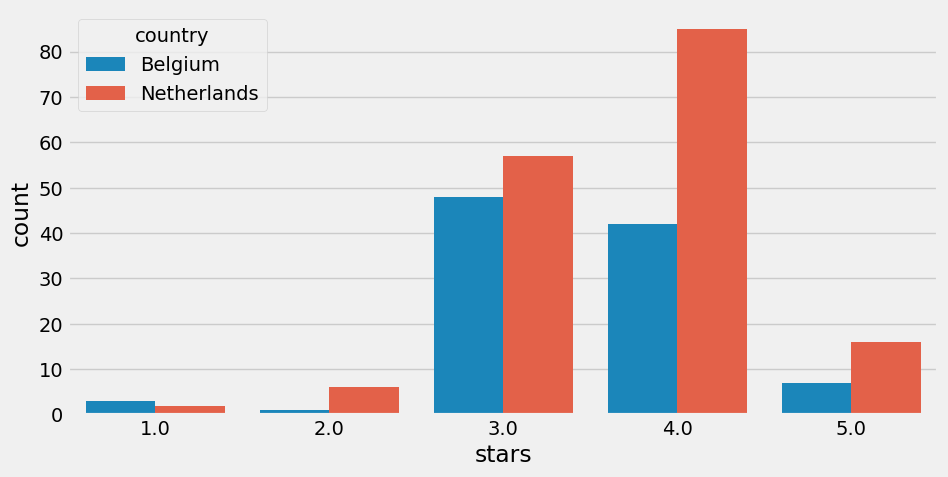

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(data=hotels_data, x='stars', hue = 'country')

Average review score by country

In [75]:
hotels_data.groupby('country')['review_score'].mean().reset_index()

,country,review_score
0,Belgium,8.188119
1,Netherlands,8.307229


In [62]:
hotels_data['review_score'] = hotels_data.review_score.round()

<Axes: xlabel='review_score', ylabel='count'>

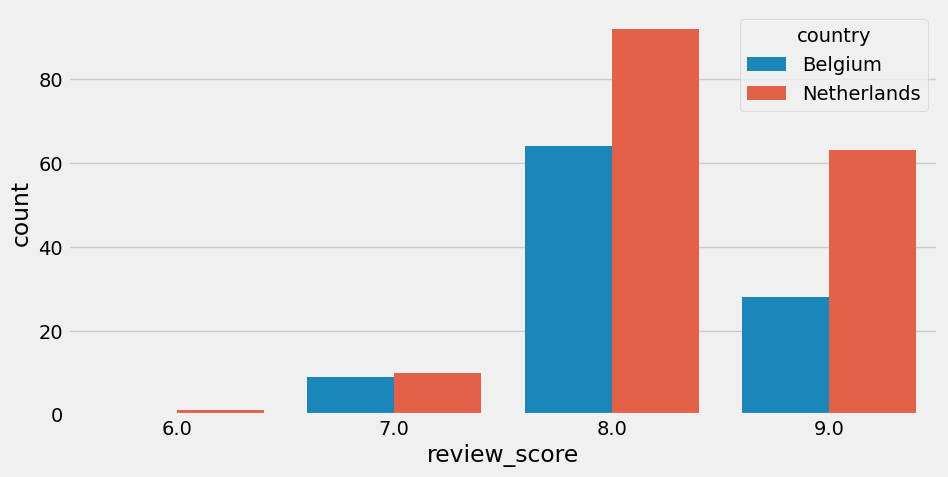

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(data=hotels_data, x='review_score', hue = 'country')

Percentage of each star by Country

<Axes: xlabel='stars', ylabel='pct'>

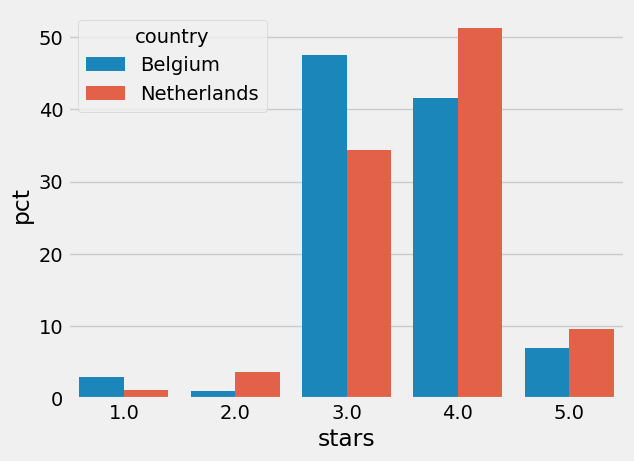

In [64]:
stars_by_country = hotels_data.groupby(['stars', 'country']).size().reset_index(name='tot')
hotels_by_country = hotels_data['country'].value_counts().reset_index()
hotels_by_country.columns = ['country', 'total_count']
merged_df = pd.merge(stars_by_country, hotels_by_country, on='country')
merged_df['pct'] = (merged_df['tot'] * 100)/merged_df['total_count']
merged_df
sns.barplot(data=merged_df, x='stars', y='pct', hue='country')


<Axes: xlabel='review_score', ylabel='pct'>

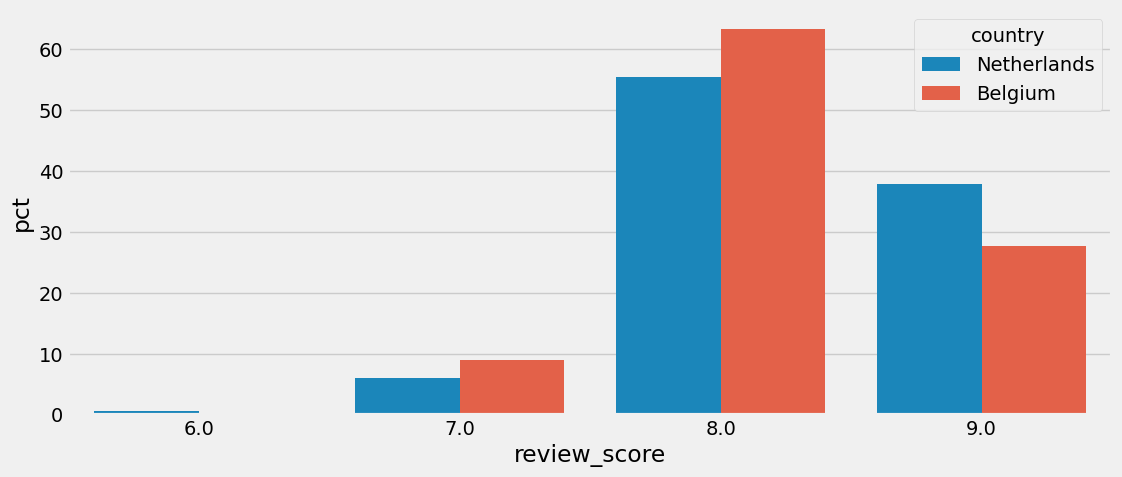

In [77]:
plt.figure(figsize=(12,5))
review_score_by_country = hotels_data.groupby(['review_score', 'country']).size().reset_index(name='tot')
merged_df = pd.merge(review_score_by_country, hotels_by_country, on='country')
merged_df['pct'] = (merged_df['tot'] * 100)/merged_df['total_count']
merged_df
sns.barplot(data=merged_df, x='review_score', y='pct', hue='country')